In [2]:
import pandas as pd
import gensim
import time
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

In [5]:
with open('Data/Germany_stemmed.txt') as file:
    lines = file.readlines()

/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
lines[0]

/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'great place visit great visit histor build unfortun could get reserv visit glass dome parliament build pleas book well advanc\n'

In [7]:
len(lines)

/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


27827

## Tokenize

In [8]:
list(gensim.utils.tokenize(lines[0], deacc = True))

/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['great',
 'place',
 'visit',
 'great',
 'visit',
 'histor',
 'build',
 'unfortun',
 'could',
 'get',
 'reserv',
 'visit',
 'glass',
 'dome',
 'parliament',
 'build',
 'pleas',
 'book',
 'well',
 'advanc']

In [9]:
corpus = [list(gensim.utils.tokenize(line, deacc = True)) for line in lines]

/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
corpus = pd.DataFrame({'reviews': corpus})
corpus.head()

/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


reviews
0  [great, place, visit, great, visit, histor, bu...
1  [histori, nerd, stop, polit, center, germani, ...
2  [famou, reichstag, admir, outsid, gave, us, id...
3  [must, tour, berlin, build, import, much, hist...
4  [plan, ahead, found, place, berlin, advanc, re...

In [11]:
docs = corpus['reviews']

/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Bag of words

In [12]:
dictionary = gensim.corpora.Dictionary(docs)

/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
count=0
for k,v in dictionary.iteritems():
    print(k,v)
    count+=1
    if count>20:
        break

0 awesom
1 freedo
2 god
3 immacul
4 place
5 respect
6 seek
7 show
8 suggest
9 tri
10 visit
11 area
12 buddha
13 come
14 cover
15 crowd
16 current
17 day
18 enjoy
19 except
20 go


In [12]:
bow = [dictionary.doc2bow(doc) for doc in docs]

In [13]:
start = time.time()
lda_model = gensim.models.LdaModel(bow,
                                    num_topics=50,
                                    id2word=dictionary,
                                    passes=2)
end = time.time()
print("Processing time: %fs" % (end - start))

Processing time: 6.650696s


In [14]:
for idx,topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic))
    print("\n")

Topic: 0 
Words: 0.044*"amaz" + 0.037*"visit" + 0.035*"night" + 0.029*"great" + 0.028*"must" + 0.027*"light" + 0.025*"even" + 0.024*"experi" + 0.023*"worth" + 0.022*"see"


Topic: 1 
Words: 0.088*"pagoda" + 0.025*"make" + 0.022*"cool" + 0.021*"friendli" + 0.021*"water" + 0.020*"door" + 0.019*"walk" + 0.019*"averag" + 0.018*"littl" + 0.016*"time"


Topic: 2 
Words: 0.046*"nice" + 0.046*"walk" + 0.046*"lot" + 0.042*"day" + 0.029*"climb" + 0.028*"area" + 0.027*"see" + 0.024*"park" + 0.024*"stair" + 0.020*"worth"


Topic: 3 
Words: 0.200*"garden" + 0.053*"market" + 0.034*"product" + 0.019*"ming" + 0.014*"small" + 0.014*"area" + 0.013*"look" + 0.013*"build" + 0.013*"sell" + 0.013*"love"


Topic: 4 
Words: 0.074*"place" + 0.056*"visit" + 0.032*"park" + 0.022*"see" + 0.020*"good" + 0.019*"one" + 0.016*"go" + 0.016*"huge" + 0.015*"beauti" + 0.015*"insid"


Topic: 5 
Words: 0.051*"photo" + 0.039*"crowd" + 0.028*"get" + 0.027*"place" + 0.027*"visit" + 0.026*"take" + 0.019*"peopl" + 0.019*"touris

In [15]:
pyLDAvis.enable_notebook()

In [18]:
gensimvis.prepare(lda_model, bow, dictionary)

/Users/thuytdv/miniforge3/envs/PycharmProjects/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(
/Users/thuytdv/miniforge3/envs/PycharmProjects/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/thuytdv/miniforge3/envs/PycharmProjects/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/thuytdv/miniforge3/envs/PycharmProjects/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alte

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
17     0.081045  0.224298       1        1  8.519704
28     0.108292  0.122687       2        1  6.147405
12     0.002639  0.079946       3        1  5.137218
44     0.090479 -0.169489       4        1  4.037993
47     0.018621  0.049350       5        1  3.925837
31     0.051256  0.178475       6        1  3.570259
38     0.022752  0.005228       7        1  3.313706
43     0.151721 -0.083302       8        1  3.294404
0      0.089453 -0.013981       9        1  3.248808
11     0.074532 -0.185403      10        1  3.110995
37     0.114420  0.105241      11        1  2.947050
26     0.154263 -0.029312      12        1  2.745528
14     0.079143  0.104191      13        1  2.592710
2      0.171415 -0.041837      14        1  2.591720
4      0.117693 -0.027953      15        1  2.335091
39     0.084942 -0.055038      16        1  2.268543
36     0.025560 -0.163302      17        1  2.134050
5      0.119186 -0.014267      18        1  2.113308
9      0.022522  0.127096      19        1  2.008989
34     0.052341 -0.049107      20        1  1.858679
6      0.026516  0.019594      21        1  1.829003
15     0.010101 -0.013743      22        1  1.712440
16     0.087554  0.044886      23        1  1.701092
41     0.012793  0.022466      24        1  1.563805
3      0.036662 -0.156149      25        1  1.556256
48     0.097353 -0.033470      26        1  1.536673
46     0.070441 -0.028946      27        1  1.515964
25    -0.068872  0.030034      28        1  1.489557
7      0.093446 -0.120973      29        1  1.405505
32    -0.001595  0.005664      30        1  1.314417
35     0.004509  0.054929      31        1  1.225304
22    -0.018407  0.056958      32        1  1.225173
1      0.027691  0.051387      33        1  1.128343
49    -0.039071 -0.016840      34        1  1.060744
42    -0.218374  0.143498      35        1  1.052819
19    -0.078156  0.029620      36        1  1.032408
18    -0.056854  0.042049      37        1  0.953726
23    -0.074860 -0.093318      38        1  0.864443
45    -0.012394  0.084652      39        1  0.834212
13    -0.162728 -0.083899      40        1  0.798009
10    -0.114800  0.013381      41        1  0.791451
21    -0.109535  0.006908      42        1  0.779284
8     -0.041422  0.035005      43        1  0.756894
24    -0.220245 -0.104916      44        1  0.601256
40    -0.186769  0.001069      45        1  0.593032
29    -0.178150 -0.013996      46        1  0.582595
33    -0.065143 -0.013005      47        1  0.578297
20    -0.167009  0.028015      48        1  0.564334
30    -0.132351 -0.013479      49        1  0.554586
27    -0.152606 -0.140902      50        1  0.496382, topic_info=        Term         Freq        Total Category  logprob  loglift
2227  garden  3312.000000  3312.000000  Default  30.0000  30.0000
148     view  6813.000000  6813.000000  Default  29.0000  29.0000
1469   macau  2111.000000  2111.000000  Default  28.0000  28.0000
499   ticket  2105.000000  2105.000000  Default  27.0000  27.0000
43      cabl  2382.000000  2382.000000  Default  26.0000  26.0000
...      ...          ...          ...      ...      ...      ...
326     free    24.550322  1348.224249  Topic50  -4.9273   1.2998
268     amaz    26.778309  2532.683870  Topic50  -4.8404   0.7561
189     well    20.521079  3019.737220  Topic50  -5.1065   0.3141
127    worth    20.529592  3728.730939  Topic50  -5.1061   0.1036
142    great    20.608441  5393.812280  Topic50  -5.1023  -0.2617

[3089 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
436      13  0.897600   aback
4077     42  0.977687    abil
2572      6  0.950121    abit
4046     41  0.971964  abound
437      13  0.953430  absenc
...     ...       ...     ...
3003     30  0.982315    zone
2761      1  0.007483     zoo
2761      5  0.883044     zoo
2761     22  0.007483     zoo
2761     28

## TF-IDF

In [19]:
tfidf = gensim.models.TfidfModel(bow)
tfidf = tfidf[bow]

In [20]:
start = time.time()
lda_model_tfidf = gensim.models.LdaModel(tfidf, 
                                         num_topics=50, 
                                         id2word = dictionary, 
                                         passes = 2)
end = time.time()
print("Processing time: %fs" % (end - start))

Processing time: 5.854091s


In [21]:
for idx, topic in lda_model_tfidf.print_topics(-1):
    print("Topic: {} Word: {}".format(idx, topic))
    print("\n")

Topic: 0 Word: 0.096*"dragon" + 0.025*"overlook" + 0.017*"symbol" + 0.014*"will" + 0.014*"surviv" + 0.014*"absorb" + 0.013*"film" + 0.012*"sat" + 0.012*"restroom" + 0.011*"dog"


Topic: 1 Word: 0.068*"tomb" + 0.033*"bargain" + 0.032*"outstand" + 0.028*"photographi" + 0.025*"cart" + 0.020*"golf" + 0.020*"exhaust" + 0.015*"forward" + 0.015*"urban" + 0.012*"r"


Topic: 2 Word: 0.033*"tourism" + 0.022*"fashion" + 0.018*"reserv" + 0.015*"restrict" + 0.012*"twin" + 0.012*"gain" + 0.010*"van" + 0.010*"unmiss" + 0.010*"jewelleri" + 0.009*"jan"


Topic: 3 Word: 0.038*"suzhou" + 0.031*"garden" + 0.018*"hous" + 0.013*"west" + 0.012*"old" + 0.010*"classic" + 0.009*"land" + 0.009*"peak" + 0.009*"east" + 0.008*"beauti"


Topic: 4 Word: 0.047*"mandarin" + 0.018*"gold" + 0.016*"heard" + 0.015*"yo" + 0.015*"dive" + 0.014*"burial" + 0.013*"interpret" + 0.013*"dancer" + 0.011*"troubl" + 0.011*"introduc"


Topic: 5 Word: 0.133*"product" + 0.028*"chill" + 0.022*"select" + 0.018*"lookout" + 0.016*"proper" +

In [22]:
pyLDAvis.gensim_models.prepare(lda_model_tfidf, tfidf, dictionary)

/Users/thuytdv/miniforge3/envs/PycharmProjects/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
43    -0.447715 -0.043463       1        1  32.994920
23    -0.424052  0.031696       2        1  14.429018
13    -0.342551 -0.111658       3        1   6.334251
7     -0.305460 -0.067294       4        1   4.567117
3     -0.297186  0.108711       5        1   3.412005
22    -0.230665 -0.050347       6        1   2.672416
8     -0.228512  0.012058       7        1   2.315017
42    -0.215293 -0.069482       8        1   2.193373
44    -0.196738  0.050283       9        1   1.748035
12    -0.101248 -0.000023      10        1   1.586086
31    -0.133721  0.274342      11        1   1.307873
47     0.036212 -0.003634      12        1   0.996186
20     0.001268 -0.019865      13        1   0.923768
34    -0.018417 -0.015910      14        1   0.913341
11     0.013810 -0.015322      15        1   0.880317
28     0.070013 -0.003930      16        1   0.838042
19     0.066938  0.011363      17        1   0.823002
36     0.064390  0.002103      18        1   0.804656
24     0.064029 -0.002780      19        1   0.803393
17     0.043447 -0.000180      20        1   0.791084
38     0.081105 -0.015751      21        1   0.776048
6      0.095387 -0.019567      22        1   0.769133
40     0.046895 -0.028804      23        1   0.744640
21     0.058616  0.005416      24        1   0.741578
37     0.062147  0.019748      25        1   0.721308
25     0.012643  0.032553      26        1   0.719076
0      0.076368 -0.005141      27        1   0.712010
4      0.081614  0.005022      28        1   0.684652
39     0.063323  0.000917      29        1   0.684371
18     0.082917 -0.001108      30        1   0.668197
16     0.096557  0.000204      31        1   0.649182
1      0.082173 -0.013810      32        1   0.647223
33     0.057288 -0.006894      33        1   0.637020
46     0.085307  0.001297      34        1   0.634882
41     0.084750 -0.003298      35        1   0.621882
32     0.097976  0.001935      36        1   0.611824
29     0.096499  0.008105      37        1   0.594846
5      0.096120  0.000995      38        1   0.588602
35     0.098440 -0.007013      39        1   0.587847
49     0.103422 -0.006454      40        1   0.581240
9      0.102742  0.002369      41        1   0.579060
26     0.101236 -0.004394      42        1   0.561455
30     0.098721 -0.012534      43        1   0.545273
14     0.103633 -0.003436      44        1   0.538441
2      0.102956 -0.001877      45        1   0.532034
45     0.101255 -0.009474      46        1   0.530595
48     0.102282 -0.011872      47        1   0.521317
27     0.103459 -0.002359      48        1   0.497396
15     0.100611 -0.003514      49        1   0.493594
10     0.105008 -0.007928      50        1   0.491371, topic_info=         Term        Freq       Total Category  logprob  loglift
2227   garden  345.000000  345.000000  Default  30.0000  30.0000
3846   church  177.000000  177.000000  Default  29.0000  29.0000
4237  univers  109.000000  109.000000  Default  28.0000  28.0000
418      peak  168.000000  168.000000  Default  27.0000  27.0000
3774   pagoda  115.000000  115.000000  Default  26.0000  26.0000
...       ...         ...         ...      ...      ...      ...
24       ping    0.035252   15.346925  Topic50  -9.3259  -0.7604
23      ngong    0.032142   10.960132  Topic50  -9.4182  -0.5161
1750    flash    0.028947    6.135814  Topic50  -9.5229  -0.0407
1498   welcom    0.028260   13.484584  Topic50  -9.5469  -0.8521
2110    grand    0.030240   38.728930  Topic50  -9.4792  -1.8394

[2134 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
1291      6  0.255802     a
1291     40  0.255802     a
1291     45  0.255802     a
4077     11  0.824464  abil
2572     13  0.698588  abit
...     ...       ...   ...
3003      3  0.345025  zone
3003     13  0.138010  zone
3003     14  0.483035  zone
2761      2  0.066816  

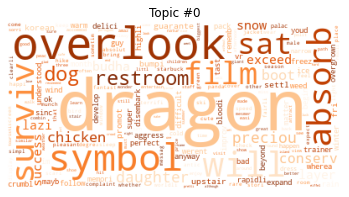

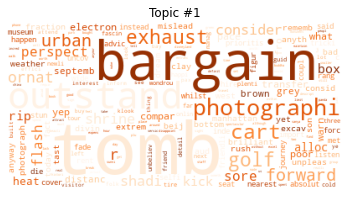

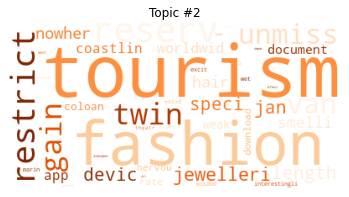

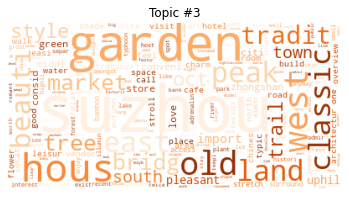

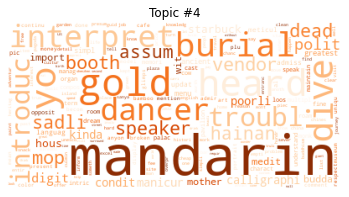

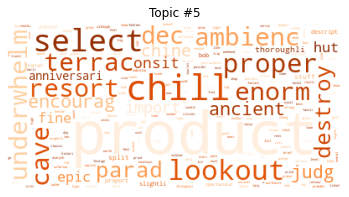

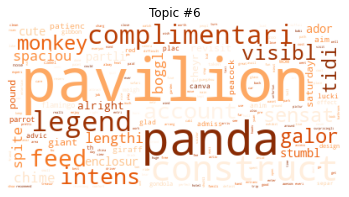

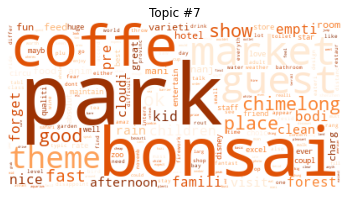

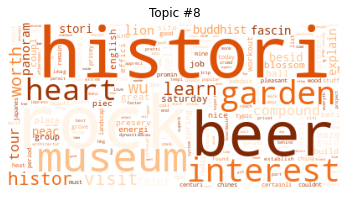

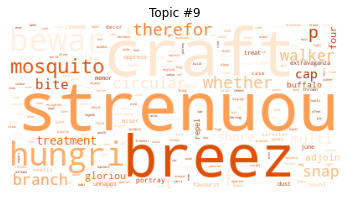

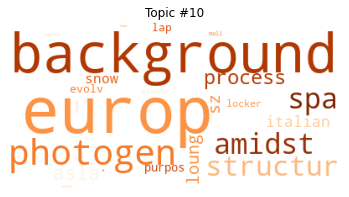

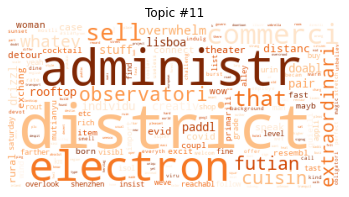

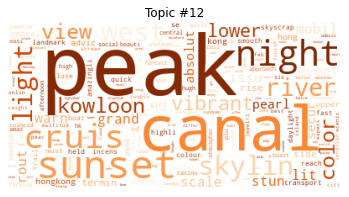

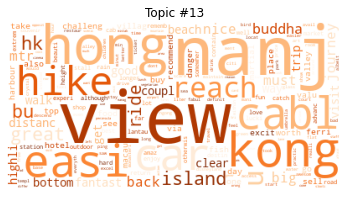

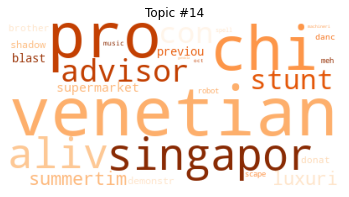

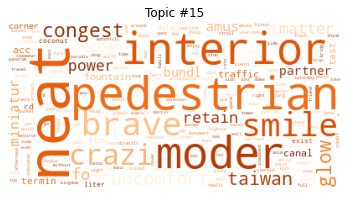

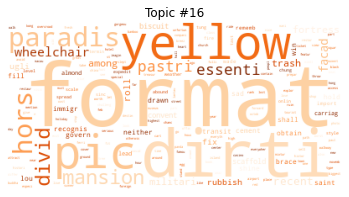

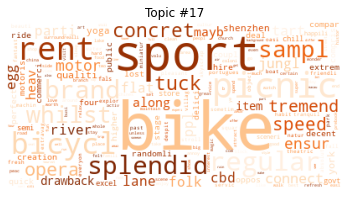

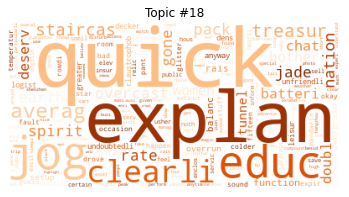

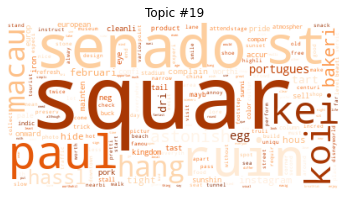

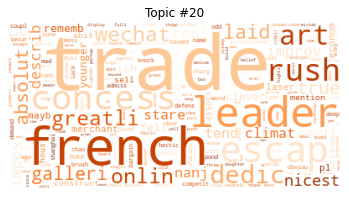

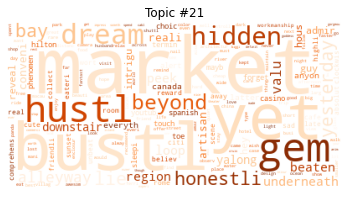

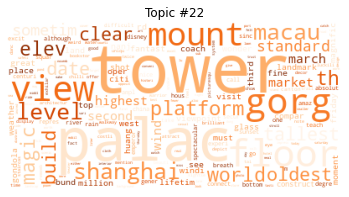

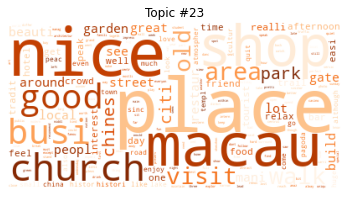

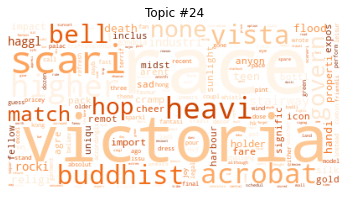

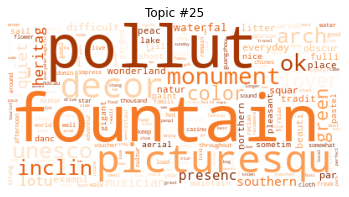

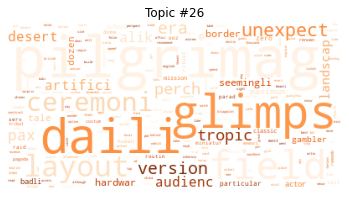

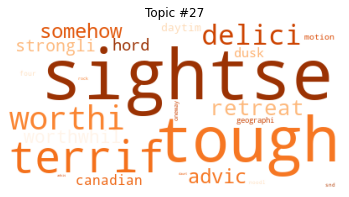

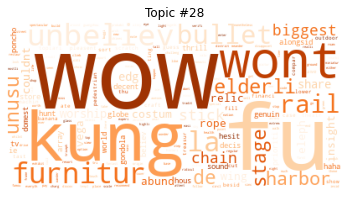

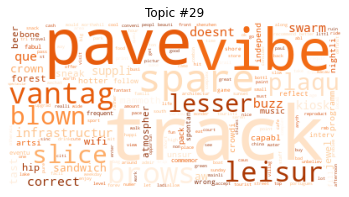

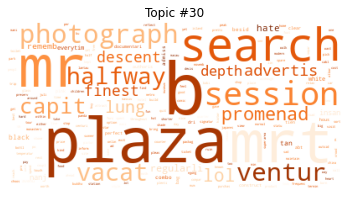

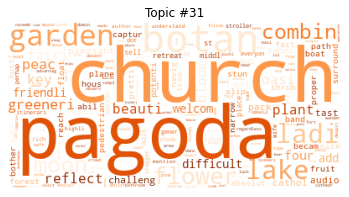

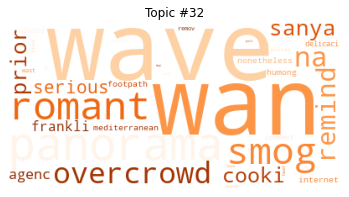

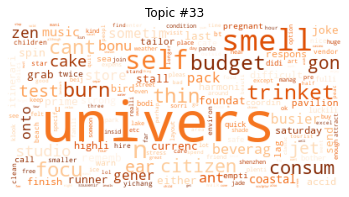

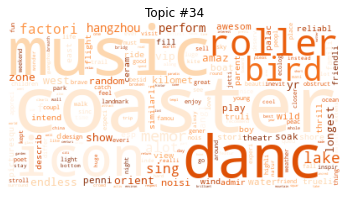

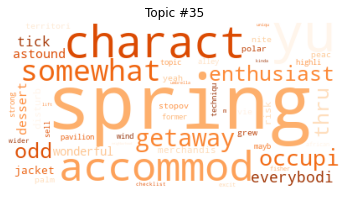

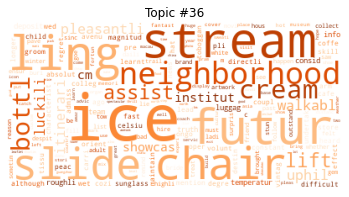

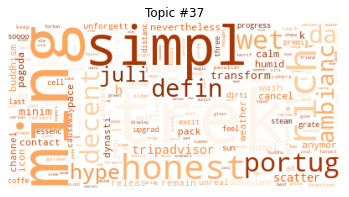

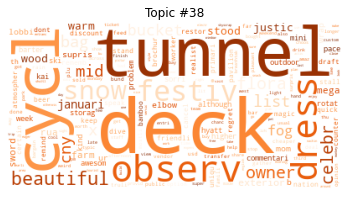

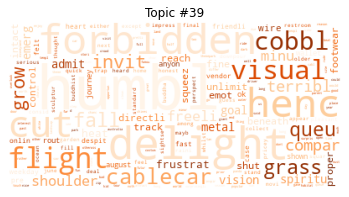

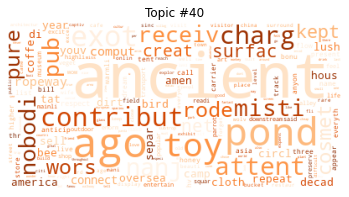

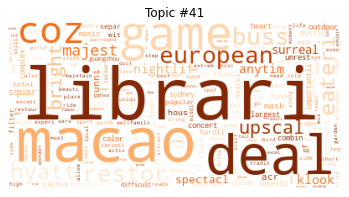

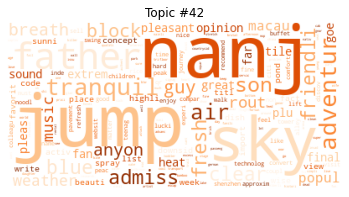

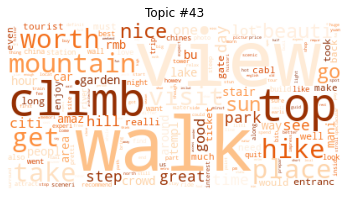

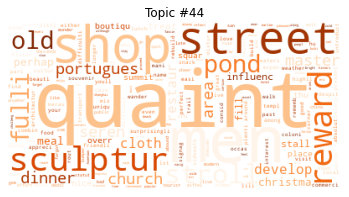

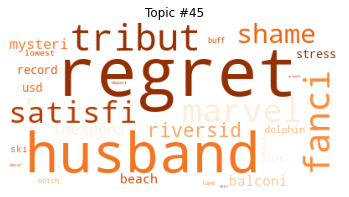

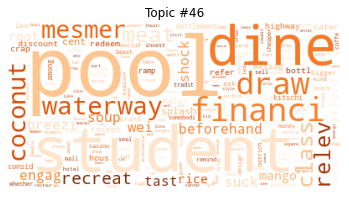

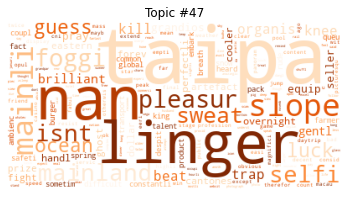

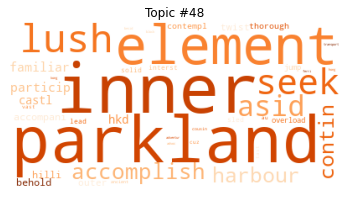

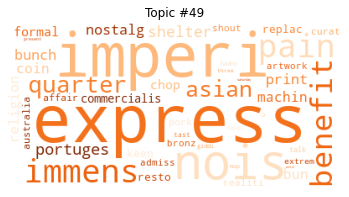

In [27]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

for t in range(lda_model_tfidf.num_topics):
    plt.figure()
    plt.imshow(WordCloud(background_color='white', colormap='Oranges').fit_words(dict(lda_model_tfidf.show_topic(t, 200))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show()